<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Algoritmos Genéticos**
---


In [14]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em ordem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '10402412, Diego Oliveira Aluizio' #@param {type:"string"}
Aluno2 = '10396490, Jônatas Garcia de Oliveira' #@param {type:"string"}
Aluno3 = '10403046, Livia Alabarse dos Santos' #@param {type:"string"}
Aluno4 = '10403028, Marina Scabello Martin' #@param {type:"string"}
Aluno5 = '10265432, Pedro Henrique Araujo Farias' #@param {type:"string"}

In [15]:
#@title **Escolha a opção de Exercício Selecionado**
Exercicio_selecionado = "Exercício A. Otimização multi-objetivo" #@param ["Exercício A. Otimização multi-objetivo", "Exercício B. Forca"]




# **Resumo**

Neste trabalho, modelamos um problema de otimização multiobjetivo envolvendo lucro e custo em uma produção agrícola.

Em seguida, utilizamos a biblioteca `pygad` para executar um algoritmo genético de modo que este encontrasse os pesos ideais para as funções objetivo apresentadas.

Por fim, exploramos diferentes resultados a partir da alteração de parâmetros do algoritmo genético, como número de gerações, tamanho de população e etc.

# **Descrição da Solução**

## **Cenário/Problema Multi-objetivo Original: Otimização de Produção Agrícola**

### **Descrição do Problema**

Um agricultor deseja planejar a produção de três culturas (Milho, Soja e Trigo) em sua fazenda, considerando dois objetivos conflitantes:

- **Maximizar o lucro total**
$$y = w1x1 + w2x2 + w3x3 = 50$$
$$(x1, x2, x3) = (8,5,10)$$

- **Minimizar o custo por consumo de água**
$$y = w1x4 + w2x5 + w3x6 = 40$$
$$(x4, x5, x6) = (10,6,8)$$

### **Funções Objetivo**
Foram definidas duas funções objetivo, seguindo a abordagem do exemplo fornecido:

- **Fitness do Lucro** (Maximizar)
  - Cada cultura contribui para o lucro total de acordo com a entrada definida em `function_inputs1` (valores em R$ por hectare);
  - O objetivo é encontrar uma combinação de culturas que atinja um lucro próximo ao `desired_output1 = 50`;
  - `fitness1 = 1.0 / (|output1 - desired_output1| + 0.000001)`.

- **Fitness do Consumo de Água** (Minimizar)
  - Cada cultura apresenta um custo de consumo específico de água, conforme os valores de entrada definidos em `function_inputs2` (custo em litros por hectare);
  - O objetivo é reduzir o consumo para um valor próximo a `desired_output2 = 40`;
  - `fitness2 = 1.0 / (|output2 - desired_output2| + 0.000001)`
  - Como o custo por consumo de água é um valor que desejamos minimizar, devemos inverter os valores (torná-los negativos), de modo que sua maximização resulte em uma minimização;

# **Implementação**

Inicialmente, instalamos a biblioteca `pygad`.



In [16]:
!pip install pygad

## **Sobre as Funções Objetivo**

Como queremos **minimizar** a função objetivo referente ao custo por consumo de água da plantação, devemos **inverter a função**:

$$y = w1x4 + w2x5 + w3x6 = 40$$
$$y * (-1) = -w1x4 + -w2x5 + -w3x6 = -40$$

Sendo assim, podemos expressar as entradas da segunda função objetivo como o inverso de seus valores. Logo, teremos `function_inputs2 = [-10, -6, -8]` e `desired_output2 = -40`.

In [17]:
import pygad
import numpy
import matplotlib.pyplot as plt

# Variáveis de entrada (pesos que influenciam lucro e uso de água)
function_inputs1 = [8, 5, 10]  # Impacto no lucro (R$ por hectare)
function_inputs2 = [-10, -6, -8] # Consumo de água (litros por hectare)

desired_output1 = 50  # Nível desejado de lucro
desired_output2 = -40  # Nível desejado de consumo de água (quanto menor, melhor)


def fitness_func(ga_instance, solution, solution_idx):
    output1 = numpy.sum(solution * function_inputs1)
    output2 = numpy.sum(solution * function_inputs2)
    fitness1 = 1.0 / (numpy.abs(output1 - desired_output1) + 0.000001)
    fitness2 = 1.0 / (numpy.abs(output2 - desired_output2) + 0.000001)
    return [fitness1, fitness2]

# **Resultados (Testes)**

Com base na função `fitness_func` acima, definida no [exemplo multi-objetivo](https://pygad.readthedocs.io/en/latest/pygad.html#linear-model-optimization-multi-objective), vamos executar o algoritmo genético a partir do `pygad`.

## **Simulação 1: Configuração Padrão**
Esta simulação usa os valores padrão para verificar a estabilidade do algoritmo.

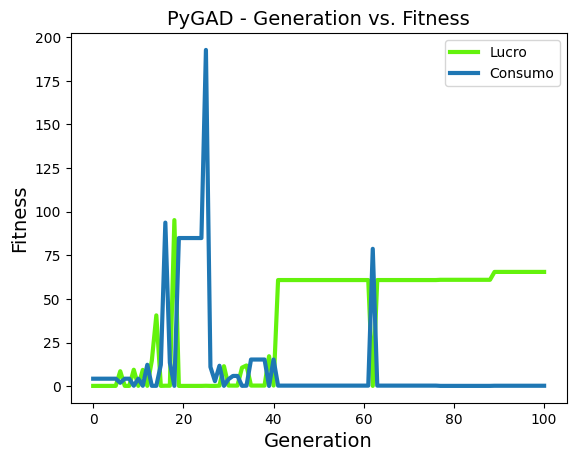

Melhores parâmetros encontrados: [0.78450502 0.96451287 3.888612  ]
Valor da função de fitness: [65.45997969  0.21092488]
Lucro estimado com a melhor solução: 49.984724490524776
Custo do consumo de água estimado com a melhor solução: 44.7410234137831
O melhor valor da função de fitness foi atingido em 25 gerações.


In [33]:
num_generations = 100
sol_per_pop = 20
num_parents_mating = 10

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(function_inputs1),
                       fitness_func=fitness_func,
                       parent_selection_type='nsga2')

ga_instance.run()
ga_instance.plot_fitness(label=['Lucro', 'Consumo'])

solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print(f"Melhores parâmetros encontrados: {solution}")
print(f"Valor da função de fitness: {solution_fitness}")

prediction1 = numpy.sum(numpy.array(function_inputs1) * solution)
print(f"Lucro estimado com a melhor solução: {prediction1}")
prediction2 = numpy.sum(numpy.array(function_inputs2) * solution)
print(f"Custo do consumo de água estimado com a melhor solução: {-1 * prediction2}")

if ga_instance.best_solution_generation != -1:
    print(f"O melhor valor da função de fitness foi atingido em {ga_instance.best_solution_generation} gerações.")

Assim, definimos como padrão:

- **Lucro de produção**: **49,98**
- **Custo de consumo**: **44,74**
- **Lucro total**: **R$5,24**

## **Simulação 2: Aumentando o número de gerações**
A expectativa é que, com mais gerações, a solução final seja mais próxima do ótimo.

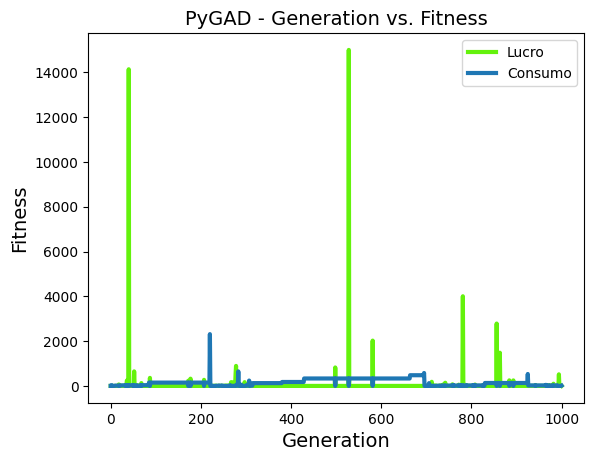

Melhores parâmetros encontrados: [-1.48949613  3.66890268  4.11994058]
Valor da função de fitness: [ 0.42157613 12.82372361]
Lucro estimado com a melhor solução: 47.62795019578341
Custo do consumo de água estimado com a melhor solução: 40.07797947046784
O melhor valor da função de fitness foi atingido em 528 gerações.


In [32]:
num_generations = 1000  # Aumentamos o número de gerações para observar uma melhor convergência
sol_per_pop = 20
num_parents_mating = 10

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(function_inputs1),
                       fitness_func=fitness_func,
                       parent_selection_type='nsga2')

ga_instance.run()
ga_instance.plot_fitness(label=['Lucro', 'Consumo'])

solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print(f"Melhores parâmetros encontrados: {solution}")
print(f"Valor da função de fitness: {solution_fitness}")

prediction1 = numpy.sum(numpy.array(function_inputs1) * solution)
print(f"Lucro estimado com a melhor solução: {prediction1}")
prediction2 = numpy.sum(numpy.array(function_inputs2) * solution)
print(f"Custo do consumo de água estimado com a melhor solução: {-1 * prediction2}")

if ga_instance.best_solution_generation != -1:
    print(f"O melhor valor da função de fitness foi atingido em {ga_instance.best_solution_generation} gerações.")

- **Lucro de produção**: **47,63**
- **Custo de consumo**: **40,08**
- **Lucro total**: **R$7,55**

Aumentar o número de gerações em 10 vezes **aumentou o lucro total** em **R$2,31** e **reduziu o custo do consumo de água** em **4,66 reais**.

## **Simulação 3: Aumentando o tamanho da população**
Um maior número de soluções na população pode levar a uma melhor convergência.

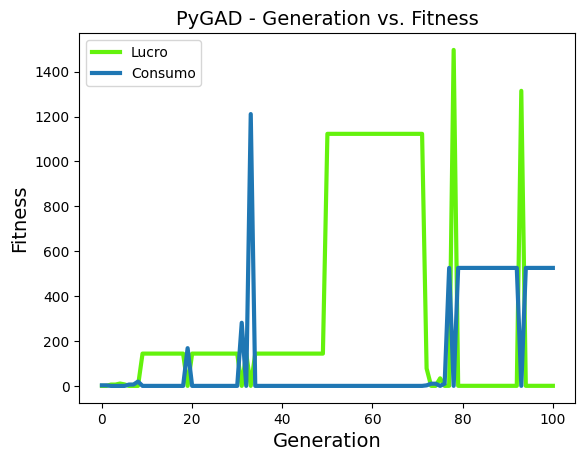

Melhores parâmetros encontrados: [-0.97738388  2.6197673   4.25666674]
Valor da função de fitness: [4.64345636e-01 5.25721073e+02]
Lucro estimado com a melhor solução: 47.84643279146445
Custo do consumo de água estimado com a melhor solução: 39.998098850646514
O melhor valor da função de fitness foi atingido em 78 gerações.


In [31]:
num_generations = 100
sol_per_pop = 50  # Maior diversidade na população inicial
num_parents_mating = 10

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(function_inputs1),
                       fitness_func=fitness_func,
                       parent_selection_type='nsga2')

ga_instance.run()
ga_instance.plot_fitness(label=['Lucro', 'Consumo'])

solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print(f"Melhores parâmetros encontrados: {solution}")
print(f"Valor da função de fitness: {solution_fitness}")

prediction1 = numpy.sum(numpy.array(function_inputs1) * solution)
print(f"Lucro estimado com a melhor solução: {prediction1}")
prediction2 = numpy.sum(numpy.array(function_inputs2) * solution)
print(f"Custo do consumo de água estimado com a melhor solução: {-1 * prediction2}")

if ga_instance.best_solution_generation != -1:
    print(f"O melhor valor da função de fitness foi atingido em {ga_instance.best_solution_generation} gerações.")

- **Lucro de produção**: **47,85**
- **Custo de consumo**: **40,00**
- **Lucro total**: **R$7,85**

Com o aumento do tamanho da população, o **lucro total aumentou em R$2,61**.

## **Simulação 4: Aumentando o número de pais na reprodução**
Um maior número de pais permite mais combinações genéticas, possivelmente melhorando a qualidade das soluções.

/usr/local/lib/python3.11/dist-packages/pygad/pygad.py:724: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(


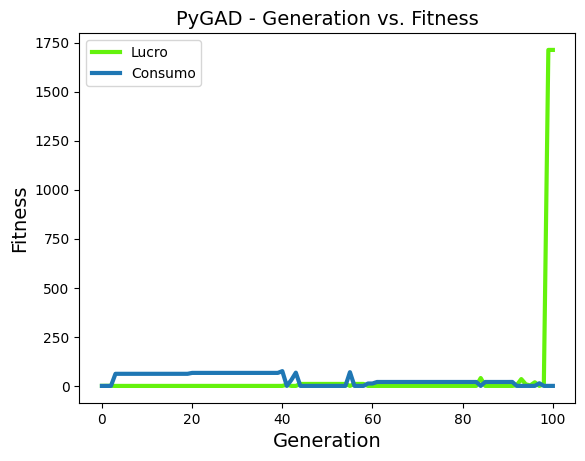

Melhores parâmetros encontrados: [ 3.84307782 -4.43777801  4.14448505]
Valor da função de fitness: [1.71224010e+03 2.01613247e-01]
Lucro estimado com a melhor solução: 50.000583030242936
Custo do consumo de água estimado com a melhor solução: 44.95999055352786
O melhor valor da função de fitness foi atingido em 99 gerações.


In [30]:
num_generations = 100
sol_per_pop = 20
num_parents_mating = 15  # Maior diversidade genética na reprodução

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(function_inputs1),
                       fitness_func=fitness_func,
                       parent_selection_type='nsga2')

ga_instance.run()
ga_instance.plot_fitness(label=['Lucro', 'Consumo'])

solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print(f"Melhores parâmetros encontrados: {solution}")
print(f"Valor da função de fitness: {solution_fitness}")

prediction1 = numpy.sum(numpy.array(function_inputs1) * solution)
print(f"Lucro estimado com a melhor solução: {prediction1}")
prediction2 = numpy.sum(numpy.array(function_inputs2) * solution)
print(f"Custo do consumo de água estimado com a melhor solução: {-1 * prediction2}")

if ga_instance.best_solution_generation != -1:
    print(f"O melhor valor da função de fitness foi atingido em {ga_instance.best_solution_generation} gerações.")

- **Lucro de produção**: **50,00**
- **Custo de consumo**: **44,96**
- **Lucro total**: **R$5,04**

O lucro foi **maior** que o padrão, mas o **custo com água foi maior**.

# **Referências**

GAD, Ahmed Fawzy. Pygad: An intuitive genetic algorithm python library. *Springer*, 2023. Disponível em https://pygad.readthedocs.io/en/latest/index.html#. Acesso em: 02 abr. 2025.

PYGAD - PYTHON GENETIC ALGORITHM. *Linear Model Optimization: Multi-Objective*, 2023. Meio eletrônico. Disponível em https://pygad.readthedocs.io/en/latest/pygad.html#linear-model-optimization-multi-objective. Acesso em: 02 abr. 2025.

---

In [22]:
#@title **Avaliação**
Resumo = 10 #@param {type:"slider", min:0, max:10, step:1}

Descricao_solucao = 7 #@param {type:"slider", min:0, max:10, step:1}

Implementacao = 9 #@param {type:"slider", min:0, max:10, step:1}

Resultados = 6 #@param {type:"slider", min:0, max:10, step:1}

Referencias = 7 #@param {type:"slider", min:0, max:10, step:1}

Geral = 7 #@param {type:"slider", min:0, max:10, step:1}








In [23]:
#@title **Nota Final**
nota = Resumo + Descricao_solucao + Implementacao + Resultados + Referencias + Geral

nota = nota / 6

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.7



,tia,nome,nota
0,10402412,DIEGO OLIVEIRA ALUIZIO,7.7
1,10396490,JÔNATAS GARCIA DE OLIVEIRA,7.7
2,10403046,LIVIA ALABARSE DOS SANTOS,7.7
3,10403028,MARINA SCABELLO MARTIN,7.7
4,10265432,PEDRO HENRIQUE ARAUJO FARIAS,7.7
